# Linear algebra on n-dimensional arrays

Learning n-dimensional array (n >= 2)


In [1]:
try:
    from scipy.datasets import face
except ImportError:  # Data was in scipy.misc prior to scipy v1.10
    from scipy.misc import face

img = face()

In [2]:
type(img)

numpy.ndarray

Now you have the image as a numpy array

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


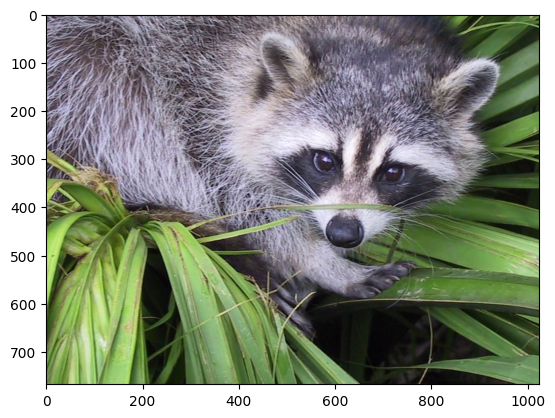

In [4]:
plt.imshow(img)
plt.show()

## Shape, axis and array properties
Note that, in linear algebra, the dimension of a vector refers to the number of entries in an array. In NumPy, it instead defines the number of axes. For example, a 1D array is a vector such as [1, 2, 3], a 2D array is a matrix, and so forth.

In [5]:
print(img.shape)

(768, 1024, 3)


The output is a tuple with three elements, which means that this is a three-dimensional array. Since this is a color image, and we have used the imread function to read it, the data is organized as a 768×1024 grid of pixels, where each pixel contains 3 values representing color channels (red, green and blue - RGB). You can see this by looking at the shape, where the leftmost number corresponds to the outermost axis (image height), the middle number to the next axis (image width) and the rightmost number to the innermost axis (the color channels).

In [6]:
print(img.ndim)

3


NumPy refers to each dimension as an axis. Because of how `imread` works, the first index in the 3rd axis is the red pixel data for our image. We can access this by using the syntax

In [7]:
print(img[:, :, 0])

[[121 138 153 ... 119 131 139]
 [ 89 110 130 ... 118 134 146]
 [ 73  94 115 ... 117 133 144]
 ...
 [ 87  94 107 ... 120 119 119]
 [ 85  95 112 ... 121 120 120]
 [ 85  97 111 ... 120 119 118]]


As expected, this is a 768x1024 matrix:

In [8]:
c = img[:, :, 0].shape
print(c)

(768, 1024)


Since we are going to perform linear algebra operations on this data, it might be more interesting to have real numbers between 0 and 1 in each entry of the matrices to represent the RGB values. We can do that by setting

In [10]:
img_array = img / 255
a, b = img_array.max(), img_array.min()
print(a, "and", b)

1.0 and 0.0


or checking the type of data in the array:

In [11]:
print(img_array.dtype)

float64


Note that we can assign each color channel to a separate matrix using the slice syntax:

In [17]:
red_array = img_array[:, :, 0]
green_array = img_array[:, :, 1]
blue_array = img_array[:, :, 2]
print(red_array)
print("-" * 80)
print(green_array)
print("-" * 80)
print(blue_array)

[[0.4745098  0.54117647 0.6        ... 0.46666667 0.51372549 0.54509804]
 [0.34901961 0.43137255 0.50980392 ... 0.4627451  0.5254902  0.57254902]
 [0.28627451 0.36862745 0.45098039 ... 0.45882353 0.52156863 0.56470588]
 ...
 [0.34117647 0.36862745 0.41960784 ... 0.47058824 0.46666667 0.46666667]
 [0.33333333 0.37254902 0.43921569 ... 0.4745098  0.47058824 0.47058824]
 [0.33333333 0.38039216 0.43529412 ... 0.47058824 0.46666667 0.4627451 ]]
--------------------------------------------------------------------------------
[[0.43921569 0.50588235 0.56470588 ... 0.49411765 0.53333333 0.56470588]
 [0.32156863 0.40392157 0.47843137 ... 0.49019608 0.55294118 0.6       ]
 [0.25882353 0.34117647 0.42352941 ... 0.49411765 0.55686275 0.6       ]
 ...
 [0.41568627 0.43137255 0.48627451 ... 0.61960784 0.61568627 0.61960784]
 [0.39607843 0.43529412 0.49803922 ... 0.61568627 0.61176471 0.61176471]
 [0.39607843 0.44313725 0.49411765 ... 0.61176471 0.60784314 0.60392157]]
-------------------------------

To proceed, import the linear algebra submodule from NumPy:
Notice we can use the `@` operator (the matrix multiplication operator for NumPy arrays, see numpy.matmul) for this:

In [18]:
from numpy import linalg
img_gray = img_array @ [0.2126, 0.7152, 0.0722]
c = img_gray.shape
print(c)

(768, 1024)


To see if this makes sense in our image, we should use a colormap from matplotlib corresponding to the color we wish to see in out image (otherwise, matplotlib will default to a colormap that does not correspond to the real data).

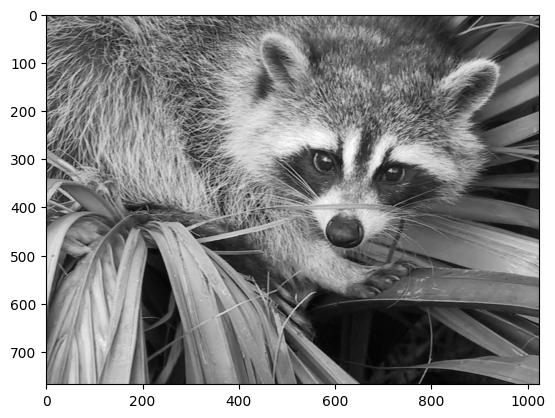

In [19]:
plt.imshow(img_gray, cmap="gray")
plt.show()

In [21]:
U, s, Vt = linalg.svd(img_gray)

Note If you are using your own image, this command might take a while to run, depending on the size of your image and your hardware. Don’t worry, this is normal! The SVD can be a pretty intensive computation.

In [22]:
print(U.shape, s.shape, Vt.shape)

(768, 768) (768,) (1024, 1024)


In [23]:
import numpy as np

Sigma = np.zeros((U.shape[1], Vt.shape[0]))
np.fill_diagonal(Sigma, s)

### Approximation
The `linalg` module includes a norm function, which computes the norm of a vector or matrix represented in a NumPy array. For example, from the SVD explanation above, we would expect the norm of the difference between img_gray and the reconstructed SVD product to be small. As expected, you should see something like

In [24]:
c = linalg.norm(img_gray - U @ Sigma @ Vt)
print(c)

1.5872734223044695e-12


In [25]:
d = np.allclose(img_gray, U @ Sigma @ Vt)
print(d)

True


To see if an approximation is reasonable, we can check the values in s:

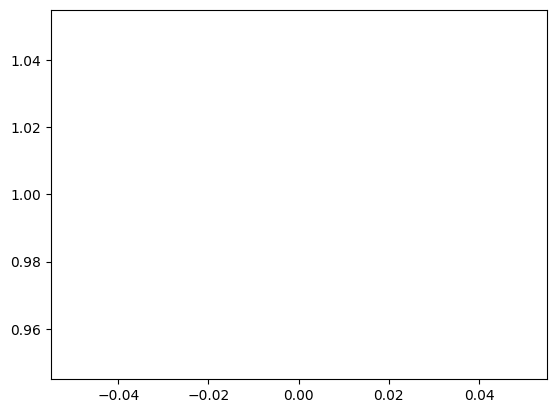

In [26]:
plt.plot(d)
plt.show()

In [27]:
k = 10

In [28]:
approx = U @ Sigma[:, :k] @ Vt[:k, :]

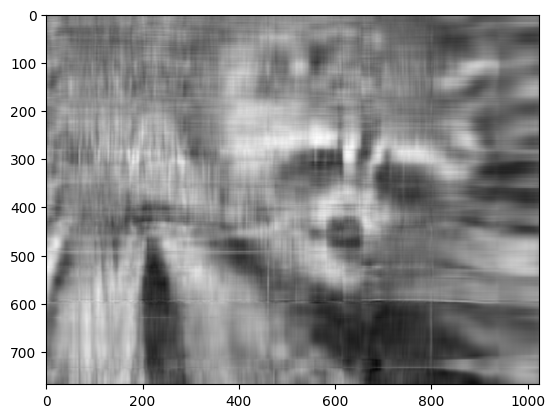

In [29]:
plt.imshow(approx, cmap="gray")
plt.show()

Note that we had to use only the first k rows of Vt, since all other rows would be multiplied by the zeros corresponding to the singular values we eliminated from this approximation.
Now, you can go ahead and repeat this experiment with other values of k, and each of your experiments should give you a slightly better (or worse) image depending on the value you choose.